![Example image](https://upload.wikimedia.org/wikipedia/commons/0/02/Northeastern_Wordmark.svg)

# Example IMDB Movie Review Text Analysis

In [1]:
import nltk
import re
import numpy as np
import pandas as pd
#Tokenization of text
from nltk.tokenize import word_tokenize,sent_tokenize
#remove stop-words
from nltk.corpus import stopwords # library 
nltk.download('stopwords')
all_stopwords = set(stopwords.words('english')) # set the language 
from typing import List

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shanusushmita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# reading review data with panda frames 
reviews_data=pd.read_csv('IMDB Dataset.csv')
reviews_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [3]:
reviews_data.head() # default is 5 rows

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### We have 50K reviews of which 49582 reviews are unique and have two types of sentiments


## Text Pre-Processing 

In [4]:
# Select columns for positive reviews
review_positive = reviews_data[reviews_data['sentiment'] == 'positive']

In [5]:
review_positive.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive


In [9]:
positive_all = ' '.join(review_positive["review"])

In [10]:
# We will split the lyrics into individual words/tokens
tokens = nltk.word_tokenize(positive_all)

In [11]:
len(tokens) # length or number of tokens 

7008900

In [12]:
# making everything lower case
positive_tokens = [re.sub(r'\W+', '', token.lower()) for token in tokens]
print(len(positive_tokens)) 

7008900


In [14]:
# Remove single-character tokens (mostly punctuation)
positive_tokens = [positive_tokens for positive_tokens in positive_tokens if len(positive_tokens) > 1]
print(len(positive_tokens)) 

5639653


In [15]:
# Remove numbers
positive_tokens = [positive_tokens for positive_tokens in positive_tokens if not positive_tokens.isnumeric()]

In [16]:
# lets see number of tokens left after removing numbers
print(len(positive_tokens))

5618602


In [17]:
all_stopwords = set(stopwords.words('english')) # set the language 

In [18]:
# Remove stopwords
positive_tokens = [positive_tokens for positive_tokens in positive_tokens if positive_tokens not in all_stopwords]
# lets see number of tokens left after stop word removal step
print(len(positive_tokens))

3090771


In [19]:
#Frequency Distribution 
fdist = nltk.FreqDist(positive_tokens)

In [20]:
# Output top 20 words
print(fdist.most_common(20)) 

[('br', 97954), ('film', 41459), ('movie', 37332), ('one', 26725), ('nt', 26587), ('like', 17278), ('good', 14673), ('great', 12897), ('story', 12737), ('time', 12199), ('see', 12034), ('well', 11516), ('would', 11256), ('also', 10756), ('really', 10735), ('even', 9583), ('much', 9125), ('first', 9012), ('people', 8689), ('love', 8556)]


In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

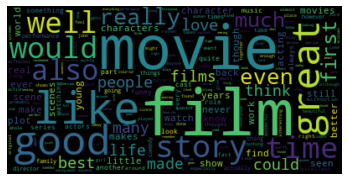

In [22]:
frequent_words = dict([(m, n) for m, n in fdist.items() if len(m) > 3])
 
wcloud = WordCloud().generate_from_frequencies(frequent_words)
 
# Plotting the wordcloud
plt.imshow(wcloud, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()